In [3]:
import librosa
import numpy as np

def extract_features(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)
    # Compute Mel-spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    # Convert to log scale (dB)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    return log_mel_spec

# Example usage
features = extract_features(r'C:\Users\LENOVO\Desktop\Moroccan Music Classifier\MoroccanMusic\rap\rap.00004.wav')
features1= extract_features(r'C:\Users\LENOVO\Desktop\Moroccan Music Classifier\MoroccanMusic\rap\rap.00002.wav')
mfcc = librosa.feature.mfcc(S=features, n_mfcc=13)



In [4]:
print(len(features))
print(features.shape)
print(len(features1))
print(features1.shape)


128
(128, 626)
128
(128, 938)


In [5]:
x, sr = librosa.load('rap.00004.wav', sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(882000,) 44100


In [ ]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

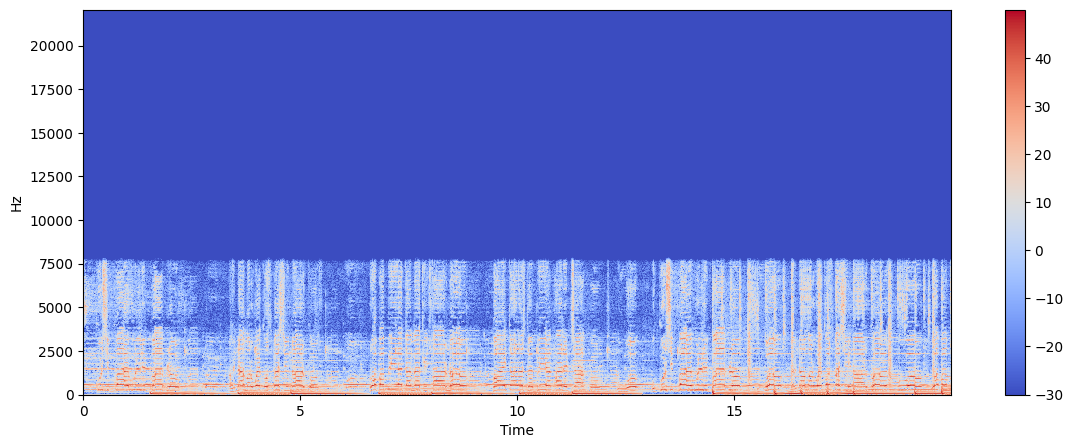

In [11]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [9]:
import tensorflow as tf

def build_audio_feature_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Input shape for 2D spectrograms
input_shape = (128, None, 1)  # Height, width, channels (depth)
model = build_audio_feature_model(input_shape)
model.summary()


ValueError: Shapes used to initialize variables must be fully-defined (no `None` dimensions). Received: shape=(None, 128) for variable path='sequential_1/dense_3/kernel'

In [5]:
import requests

url = "https://ai-weather-by-meteosource.p.rapidapi.com/time_machine"

querystring = {"lat":"37.81021","lon":"-122.42282","date":"2021-08-24","units":"auto"}

headers = {
	"x-rapidapi-key": "80b716243cmsh183b115986349b5p11b96cjsn563b1115125d",
	"x-rapidapi-host": "ai-weather-by-meteosource.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'message': 'You are not subscribed to this API.'}
